In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

In [2]:
def rk4(f,t0,y0,tk,h):
    def nextStep(f, t, y, h):
        k0 = h*f(t,y)
        k1 = h*f(t+h/2.,y+k0/2.)
        k2 = h*f(t+h/2., y+k1/2.)
        k3 = h*f(t+h, y+k2)
        return (k0+2.*k1+2.*k2+k3)/6.
    t = []
    y = []
    t.append(t0)
    y.append(y0)
    while t0 < tk:
        h = min(h, tk - t0)
        y0 = y0 + nextStep(f, t0, y0, h)
        t0 = t0 + h
        t.append(t0)
        y.append(y0)
    return np.array(t), np.array(y)

In [3]:
def f(x):
    return x**2

In [4]:
def fVec(t,y):
    f = np.zeros((2),'float')
    f[0] = y[1]
    f[1] = -mt.sin(y[0])
    return f

In [5]:
t0 = 0.
tEnd = 4.*np.pi
y0 = np.array([1.,0.])
h = 0.25
t,y = rk4(fVec, t0, y0, tEnd,h)

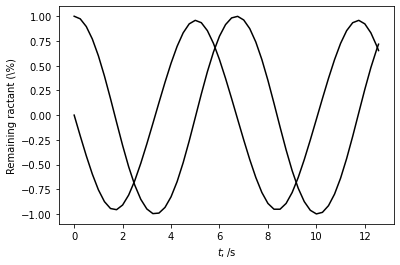

In [17]:
plt.plot(t,y,color='k')
plt.xlabel(r'$t;/\mathrm{s}$')
plt.ylabel('Remaining ractant (\%)')
plt.show()

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [10]:
soln = solve_ivp(fVec, (0,tEnd), y0,max_step=0.1)

In [15]:
tNew = soln.t
yNew = soln.y[0]
yNew1=soln.y[1]

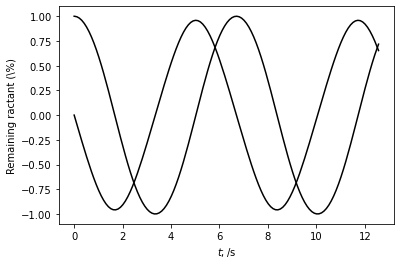

In [16]:
plt.plot(tNew,yNew,color='k')
plt.plot(tNew,yNew1,color='k')
plt.xlabel(r'$t;/\mathrm{s}$')
plt.ylabel('Remaining ractant (\%)')
plt.show()